<img src="images/logodwengo.png" alt="Banner" width="150"/>

<div>
    <font color=#690027 markdown="1">  
        <h1>LINEAIRE REGRESSIE</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
    In deze notebook zal je leren hoe je een regressielijn bepaalt met Python. Een regressielijn is een rechte die het best past bij de data en een eventuele trend die vervat is in de data, weerspiegelt. 
</div>

<div class="alert alert-box alert-warning">
    Je gebruikt de data van de notebook 'Spreidingsdiagram - Data uit bestand'. In die notebook kan je ook terugvinden hoe je de data weergeeft in een spreidingsdiagram. 
</div>

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit    # voor regressie

<div>
    <font color=#690027 markdown="1">  
        <h2>1. Data inlezen en visualiseren</h2> 
    </font>
</div>

Je leest een csv-file in die 15 datapunten bevat. Je zal deze data visualiseren.<br>
Je vindt het bestand in de map `data`: `punten.csv`.

### Opgave
- Lees het bestand in.
- Laat de inhoud zien.

In [2]:
# voorbeeldscript
punten = pd.read_csv("data/punten.csv")
punten

,x,y
0,28,33
1,40,35
2,41,47
3,44,35
4,45,55
5,51,56
6,54,50
7,57,50
8,57,70
9,60,65


- Laat het spreidingsdiagram zien.

In [3]:
# voorbeeldscript
# kolommen apart inlezen en in juiste gedaante brengen
x = punten["x"]
y = punten["y"]

x = np.array(x)
y = np.array(y)

In [4]:
# voorbeeldscript
# minima en maxima bepalen
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()
print(x_min, x_max, y_min, y_max)

28 113 33 100


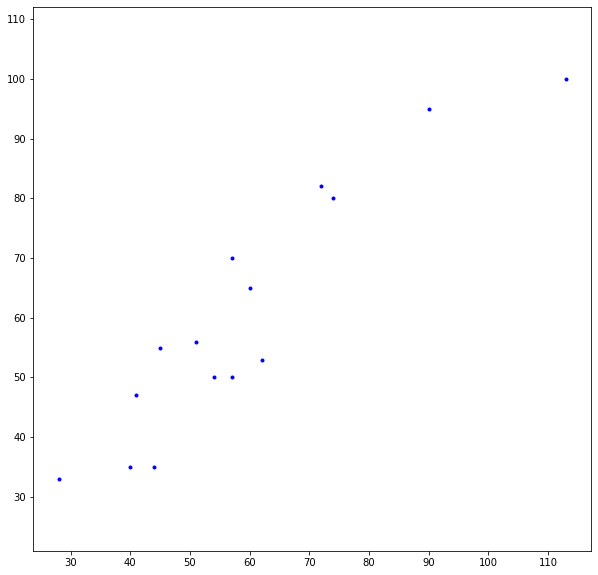

In [5]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=0, xmax=130, ymin=0, ymax=130)        # vensterinstellingen
plt.axis("equal")  
plt.xticks(np.arange(0, 130, step=10))
plt.yticks(np.arange(0, 130, step=10))

plt.scatter(x, y, color="blue", marker=".")    # plot puntenwolk

plt.show()                                          # toon grafiek

De puntenwolk ziet er *ellipsvormig* uit.<br> 
Men spreekt dan van *lineaire samenhang*: er is een *rechte* die vrij goed bij de data past. Hoe sterker de samenhang tussen de punten, hoe beter de rechte bij de data zal passen. <br><br>
In hoeverre er samenhang is tussen de x- en y- coördinaat van de gegeven punten, kan bekeken worden a.d.h.v. de *correlatiecoëfficiënt R*.

De correlatiecoëfficiënt R is een reëel getal dat steeds tussen -1 en 1 ligt. Hoe dichter R bij 0 ligt, hoe slechter de samenhang. Hoe dichter R bij 1 of -1 ligt, hoe beter de samenhang.<br>
Bij een positieve R spreekt men van een positieve samenhang, bij een negatieve R van een negatieve samenhang. 

<div>
    <font color=#690027 markdown="1">  
        <h2>2. De correlatiecoëfficiënt</h2> 
    </font>
</div>

Je kan de correlatiecoëfficiënt bepalen met de functie `corrcoef()` uit de module NumPy. Deze functie geeft eigenlijk een tabel terug met 2 rijen en 2 kolommen, waarvan de correlatiecoëfficiënt te vinden is op de eerste rij in de tweede kolom.  

In [6]:
print("Correlatiecoëfficiënt R =", np.corrcoef(x, y)[0,1])     # 0 wijst op eerste rij en 1 op tweede kolom

Correlatiecoëfficiënt R = 0.9261218269692413


Dit wijst op een *positieve sterke lineaire samenhang*. 

<div>
    <font color=#690027 markdown="1">  
        <h2>3. Lineaire regressie</h2> 
    </font>
</div>

Een (schuine) rechte heeft een vergelijking van de vorm $y =  a x + b$, m.a.w. het is de grafiek van een functie $f$ met functievoorschrift $f(x) = a x + b$. In het geval dat $ a = 0$ is de rechte horizontaal. <br><br>
Om met Python een rechte te vinden die het best past bij de data, de **regressielijn**, maak je gebruik van twee zelfgedefinieerde functies: `rechte()` en `linreg()`. 
- De functie `rechte()` geeft mee hoe het functievoorschrift van een (schuine) rechte is opgebouwd;
- de functie `linreg()` gaat op zoek naar de coëfficiënten in dat functievoorschrift.

De functie `linreg()` maakt zelf gebruik van de functie `curve_fit()` uit de module SciPy. `curve_fit()` geeft twee zaken terug, waaraan gerefereerd wordt met `popt` en `pcov`. 
- `popt` verwijst naar een lijst van de optimale parameters (dus de coëfficiënten in de vergelijking van de best passende rechte); 
- `pcov` verwijst naar de 'fout', de mate waarin de data afwijken van de gevonden rechte.

Je zal je hier beperken tot het zoeken naar de coëfficiënten. Je hebt dus enkel `popt` nodig: de lijst waarnaar `popt` verwijst, bevat de coëfficiënten $a$ en $b$. 

In [7]:
# regressielijn is rechte

# ingeven hoe vergelijking rechte is opgebouwd 
def rechte(x, a, b):
    """Voorschrift (schuine) rechte met variabele x en coëfficiënten a en b."""
    return a * x + b

# rechte zoeken die beste past bij bepaalde data, vergelijking tonen en coëfficiënten teruggeven
def linreg(x, y):
    """Rechte best passend bij data x en y."""
    popt, pcov = curve_fit(rechte, x, y)            # curve_fit() kijkt in def rechte() hoe functievoorschrift eruitziet
    # curve_fit() geeft twee zaken terug, waaraan gerefereerd wordt met popt en pcov
    # enkel eerste nodig, popt, die a en b van gezochte rechte geeft
    a, b = popt                                     # coëfficiënten
    print("y = ", a, "x +", b)                      # toon vergelijking regressielijn
    return a, b                                     # geeft coëfficiënten terug van vergelijking regressielijn

In de volgende code-cel wordt de functie `linreg()` opgeroepen met als invulling voor de parameters x en y de gegeven data x, y van in het begin van deze notebook. De functie print de vergelijking van de gezochte regressielijn en geeft de coëfficiënten terug zodat je die verder in de notebook kunt gebruiken.  

In [8]:
# coëfficiënten regressielijn bij gegeven punten
a, b = linreg(x, y)
print(a, b)

y =  0.9134752653464687 x + 6.322264291489486
0.9134752653464687 6.322264291489486


<div>
    <font color=#690027 markdown="1">  
        <h2>4. Grafiek</h2> 
    </font>
</div>

### Geef nu de puntenwolk en de regressielijn samen weer in een grafiek

Het spreidingsdiagram van de gegevens heb je reeds getekend. Je gebruikte daarvoor NumPy-lijsten van de x-waarden en de y-waarden. Nu moet je op dezelfde grafiek de regressielijn erbij tekenen. De grafiek van een rechte wordt opgebouwd uit punten die dan met elkaar verbonden worden. Je kan dezelfde x-waarden gebruiken, maar de y-waarden moeten voor de rechte voldoen aan de vergelijking van de regresselijn. In de code wordt naar die y-waarden verwezen met de variabele `y_regressielijn`. 

<div class="alert alert-box alert-warning">
    Hoe je een rechte tekent in Python, vertrekkende van de vergelijking, leerde je in de notebook 'Rechten'.
</div>

In [9]:
y_regressielijn = rechte(x, a, b)                   
# y_regressielijn verwijst naar lijst y-waarden van punten gelegen op regressielijn 
# om die y-waarden te berekenen wordt er vertrokken van de gekende x-waarden
# die x-waarden worden ingevuld in uitdrukking a x + b
print(y_regressielijn)                       

[ 31.89957172  42.86127491  43.77475017  46.51517597  47.42865123
  52.90950282  55.64992862  58.39035442  58.39035442  61.13078021
  62.95773074  72.0924834   73.91943393  88.53503817 109.54496928]


Herneem de code van hiervoor om de puntenwolk te plotten en vul de code aan om er de regressielijn bij te tekenen.

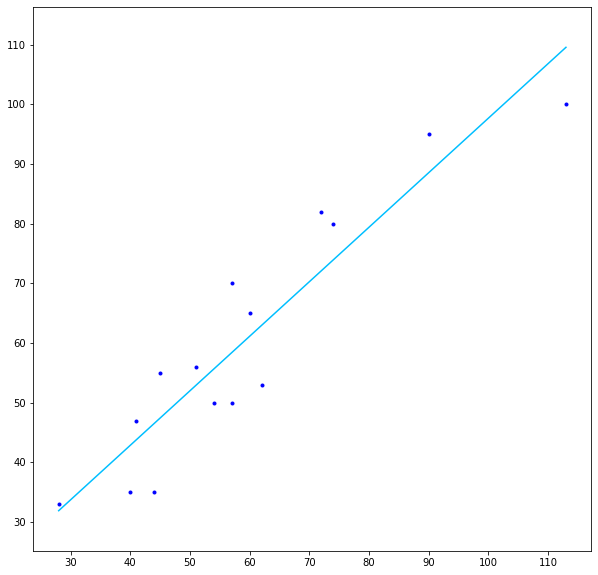

In [10]:
# voorbeeldscript
# grafiek puntenwolk samen met regressielijn
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=0, xmax=130, ymin=0, ymax=130)        # vensterinstellingen
plt.axis("equal")
plt.xticks(np.arange(0, 130, step=10))
plt.yticks(np.arange(0, 130, step=10))
                        
plt.scatter(x, y, color="blue", marker=".")    # plot puntenwolk     

plt.plot(x, y_regressielijn, color="deepskyblue")   # plot regressielijn

plt.show()                                          # toon grafiek

<div class="alert alert-box alert-info">
In het geval dat de data een bepaalde trend blootleggen, wordt de regressielijn ook een <b>trendlijn</b> genoemd. 
</div>

<div class="alert alert-box alert-warning">
In de volgende notebooks ga je aan de slag om zelf de regressielijn bij bepaalde data te visualiseren en de vergelijking van de rechte weer te geven.
</div>

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook Python in wiskunde, zie Computationeel denken - Programmeren in Python van <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière, in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 